In [42]:
%reset -f

In [43]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import xarray as xr
import os
import metpy.constants as mpconst
from metpy.units import units 
import seaborn as sns

In [44]:
os.chdir("/home/mohamed/EHTPIII/CLIMATOLOGIE/CODE/")

In [45]:
infile="/home/mohamed/EHTPIII/CLIMATOLOGIE/DATA/windstress_data/WIND_STRESS_MOROCCO_3.nc"
DATA=xr.open_dataset(infile)

In [46]:
ZWS=DATA.sozotaux # zonal (over latitude)
ZWS=ZWS*units("kg*m*s^(-2)*m^(-2)")
SWS=DATA.sometauy # meridional (over longitude)
SWS=SWS*units("kg*m*s^(-2)*m^(-2)")
LON=DATA.nav_lon.astype('float32') # degree
LAT=DATA.nav_lat.astype('float32') # degree
TIME=DATA.time_counter

In [47]:
SWS_2=SWS.interp(x_2=ZWS['x'],method='nearest') # reshape the meridional wind stress to have the same shape as zonal wind stress
SWS_2=SWS_2*units("kg*m*s^(-2)*m^(-2)")

Text(0.5, 1.0, 'ZONAL WIND STRESS at 1958-01-16T00:00:00.000000000')

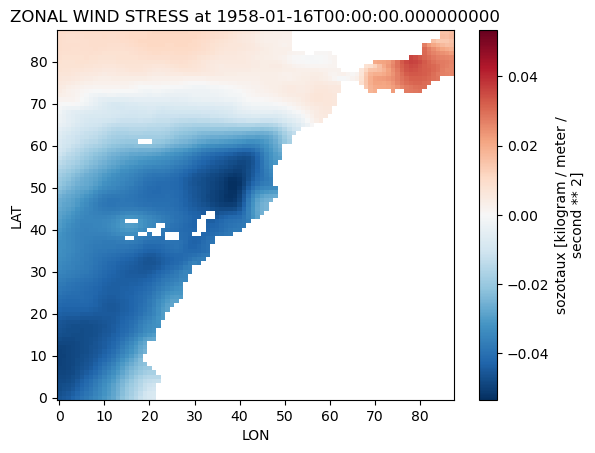

In [48]:
# ZWS.isel(time_counter=0).plot.contourf()
# ZWS.isel(time_counter=0).plot.contour()
time_value = TIME.isel(time_counter=0).values 
ZWS.isel(time_counter=0).plot()
plt.xlabel("LON")
plt.ylabel("LAT")
plt.title(f"ZONAL WIND STRESS at {time_value.astype(str)}")

In [49]:
omega=mpconst.omega
Rho_A=mpconst.dry_air_density_stp
Rho_W=mpconst.rho_l

In [50]:
f=2*omega*np.sin(LAT)
Fi=[0.8753019,0.6205065,1.029891]*units.rad # the angle between Moroccan Coeastline and the Equator
Cd=1.3*10**(-3)*units("kg*m/s")
fi=Fi.mean()

In [51]:
f_stacked = np.stack([f] * 684, axis=0)
f_stacked.shape

(684, 88, 88)

In [52]:
f_stacked=f_stacked*units("1/s")

In [53]:
TOx=  SWS_2*units("1/m")
TOy= ZWS*units("1/m")
Qx=TOy/(Rho_W*f_stacked)*(1e3)*units("1/km") # ekman transport / we multiply by 10³ to convert the unit into m³s^-1Km-1
Qy=-TOx/(Rho_W*f_stacked)*(1e3)*units("1/km")

Text(0.5, 1.0, 'EKMAN TRANSPORT')

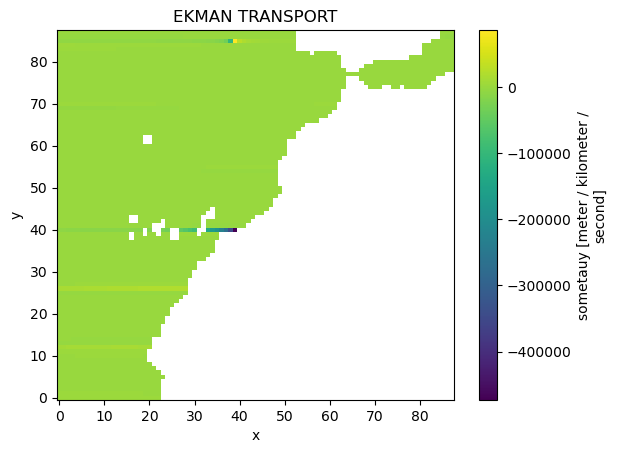

In [54]:
Qy[2,:,:].plot(vmin=np.min(Qy[2,:,:]).values, vmax=np.max(Qy[2,:,:]).values, cmap='viridis')
plt.title("EKMAN TRANSPORT")

In [55]:
UI=-(np.sin(fi-np.pi/2)*Qx+np.cos(fi-np.pi/2)*Qy)# THE UPWELLING INDEX
# UI=UI.to('m^3/(s*km)')

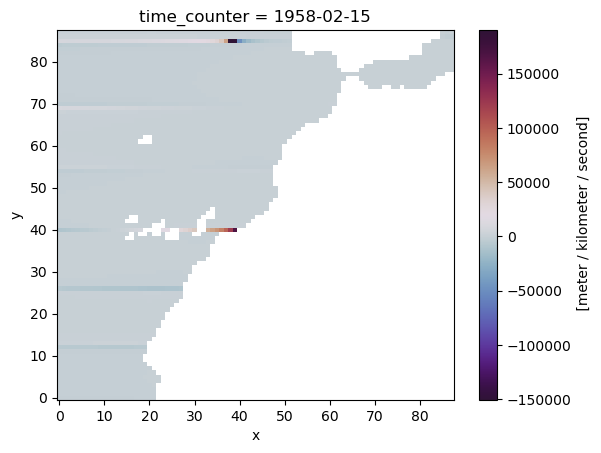

In [56]:
MAP=UI[1,:,:]
MAP.plot(vmin=np.min(MAP).values, vmax=np.max(MAP).values, cmap='twilight_shifted')

In [57]:
CITY = {
    'Tangier': {'latitude': 35.7673, 'longitude': -5.7990},
    'Casablanca': {'latitude': 33.5731, 'longitude': -7.5898},
    'Rabat': {'latitude': 34.0209, 'longitude': -6.8416},
    'Agadir': {'latitude': 30.4278, 'longitude': -9.5982},
    'El Jadida': {'latitude': 33.2531, 'longitude': -8.5377},
    'Essaouira': {'latitude': 31.5085, 'longitude': -9.7600},
    'Safi': {'latitude': 32.2989, 'longitude': -9.2378},
    'Mohammedia': {'latitude': 33.6833, 'longitude': -7.3667},
    'Nador': {'latitude': 35.1712, 'longitude': -2.9280},
    'Al Hoceima': {'latitude': 35.2459, 'longitude': -3.9964},
}

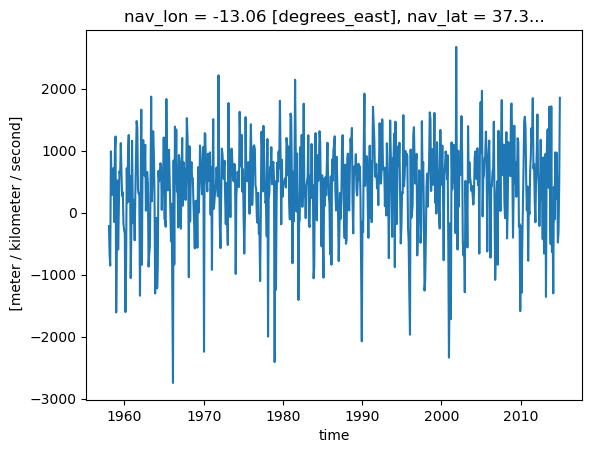

In [58]:
MAP_2=UI[:,int(CITY["Tangier"]["longitude"]),int(CITY["Tangier"]["latitude"])]
MAP_2.plot()

In [68]:
UI.variable

Magnitude,[[[-1836.5205078125 -1839.43359375 -1831.1026611328125 ... nan nan nan] [-1043.825927734375 -1047.9942626953125 -1046.051513671875 ... nan nan nan] [-760.1331787109375 -765.0568237304688 -766.016845703125 ... nan nan nan] ... [2579.6123046875 2545.8583984375 2527.731689453125 ... 303.99847412109375 349.02728271484375 270.19354248046875] [690.2212524414062 675.7254638671875 663.2461547851562 ... -2174.794921875 -3110.563232421875 -3152.18359375] [413.47467041015625 407.4447326660156 400.892578125 ... -332.8677062988281 -364.2960510253906 -318.290771484375]] [[-1249.718994140625 -1249.381103515625 -1242.702392578125 ... nan nan nan] [-701.2229614257812 -703.7922973632812 -701.4208984375 ... nan nan nan] [-506.9962463378906 -510.11956787109375 -509.4394836425781 ... nan nan nan] ... [7861.22412109375 7790.9560546875 7757.9296875 ... 214.2072296142578 286.0699157714844 236.84744262695312] [2099.349609375 2060.52880859375 2029.990966796875 ... -1328.6927490234375 -2274.953857421875 -2619.575927734375] [1251.398193359375 1229.401611328125 1211.9044189453125 ... -185.29092407226562 -237.44573974609375 -225.4871826171875]] [[-2232.579833984375 -2243.793212890625 -2244.97216796875 ... nan nan nan] [-1259.401123046875 -1267.9478759765625 -1269.26904296875 ... nan nan nan] [-914.74755859375 -920.751953125 -922.18994140625 ... nan nan nan] ... [10275.4072265625 10323.2158203125 10411.97265625 ... -1609.1353759765625 -1497.126708984375 -1502.7437744140625] [2725.5302734375 2715.542724609375 2713.908203125 ... 9631.3408203125 11194.5927734375 14773.666015625] [1605.87744140625 1602.7398681640625 1602.799560546875 ... 1019.5530395507812 1005.5621948242188 1062.5126953125]] ... [[-1685.3040771484375 -1706.32177734375 -1722.337890625 ... nan nan nan] [-961.3767700195312 -969.6127319335938 -976.1170654296875 ... nan nan nan] [-699.2254028320312 -704.3387451171875 -709.8597412109375 ... nan nan nan] ... [-206.15679931640625 -7.34124755859375 92.12982177734375 ... 195.2748260498047 174.6822509765625 164.47544860839844] [27.91070556640625 43.986114501953125 55.22442626953125 ... -847.0833740234375 -801.8875732421875 -968.868408203125] [57.24168395996094 49.112091064453125 70.77561950683594 ... -75.67266845703125 -30.09897804260254 1.0815610885620117]] [[-2120.662109375 -2114.544189453125 -2106.4638671875 ... nan nan nan] [-1201.305419921875 -1199.2454833984375 -1191.875732421875 ... nan nan nan] [-872.1070556640625 -868.834716796875 -863.39892578125 ... nan nan nan] ... [-606.17333984375 -573.796875 -832.62548828125 ... -1258.9237060546875 -1355.6495361328125 -1418.957763671875] [-84.9010009765625 -118.533447265625 -162.78173828125 ... 7346.1162109375 9271.333984375 12931.9873046875] [-9.4091796875 -54.7850341796875 -55.56494140625 ... 818.772216796875 833.269287109375 889.75146484375]] [[-2725.326416015625 -2745.224365234375 -2760.8515625 ... nan nan nan] [-1532.67431640625 -1543.899169921875 -1550.903564453125 ... nan nan nan] [-1106.138427734375 -1111.693603515625 -1114.1748046875 ... nan nan nan] ... [-4596.2421875 -4718.3564453125 -5167.173828125 ... 118.36001586914062 143.4642333984375 114.395751953125] [-1145.2593994140625 -1210.426513671875 -1280.3424072265625 ... -1595.26318359375 -2133.91943359375 -2804.1455078125] [-630.3687133789062 -700.9938354492188 -710.2552490234375 ... -228.95248413085938 -220.58969116210938 -278.8040466308594]]]
Units,meter/(kilometer second)


ValueError: Cannot compare PlainQuantity and <class 'numpy.float64'>

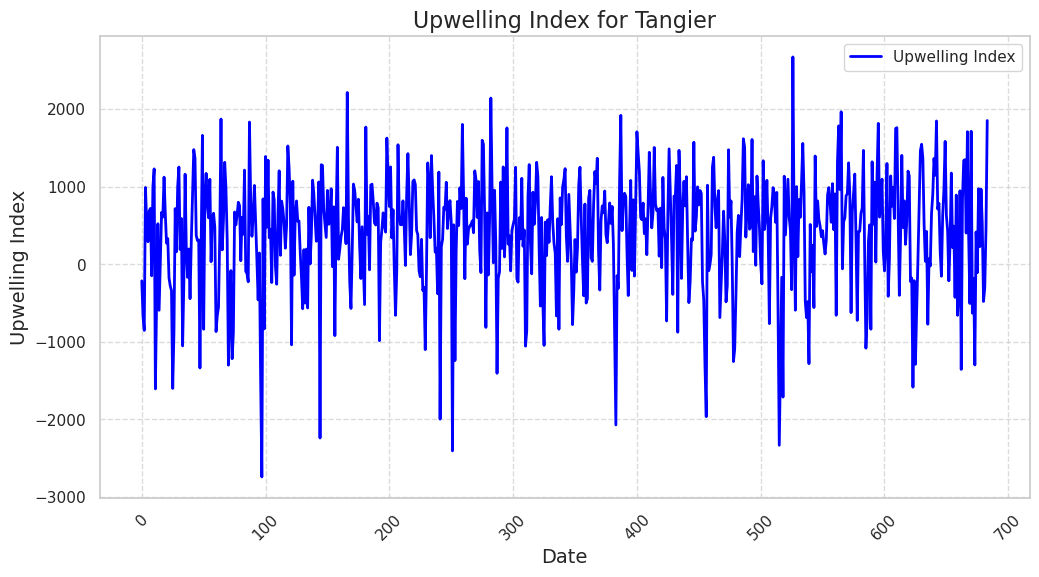

In [62]:
city_longitude = int(CITY["Tangier"]["longitude"])
city_latitude = int(CITY["Tangier"]["latitude"])
MAP_2=UI[:,int(CITY["Tangier"]["longitude"]),int(CITY["Tangier"]["latitude"])]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Use seaborn style for better aesthetics

# Create the plot
plt.plot( MAP_2, color='blue', linewidth=2, label='Upwelling Index')

# Add a title and labels
plt.title('Upwelling Index for Tangier', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Upwelling Index', fontsize=14)

# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add a grid
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Optionally, add a horizontal line for the mean
mean_value = MAP_2.mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Value')

# Show the plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

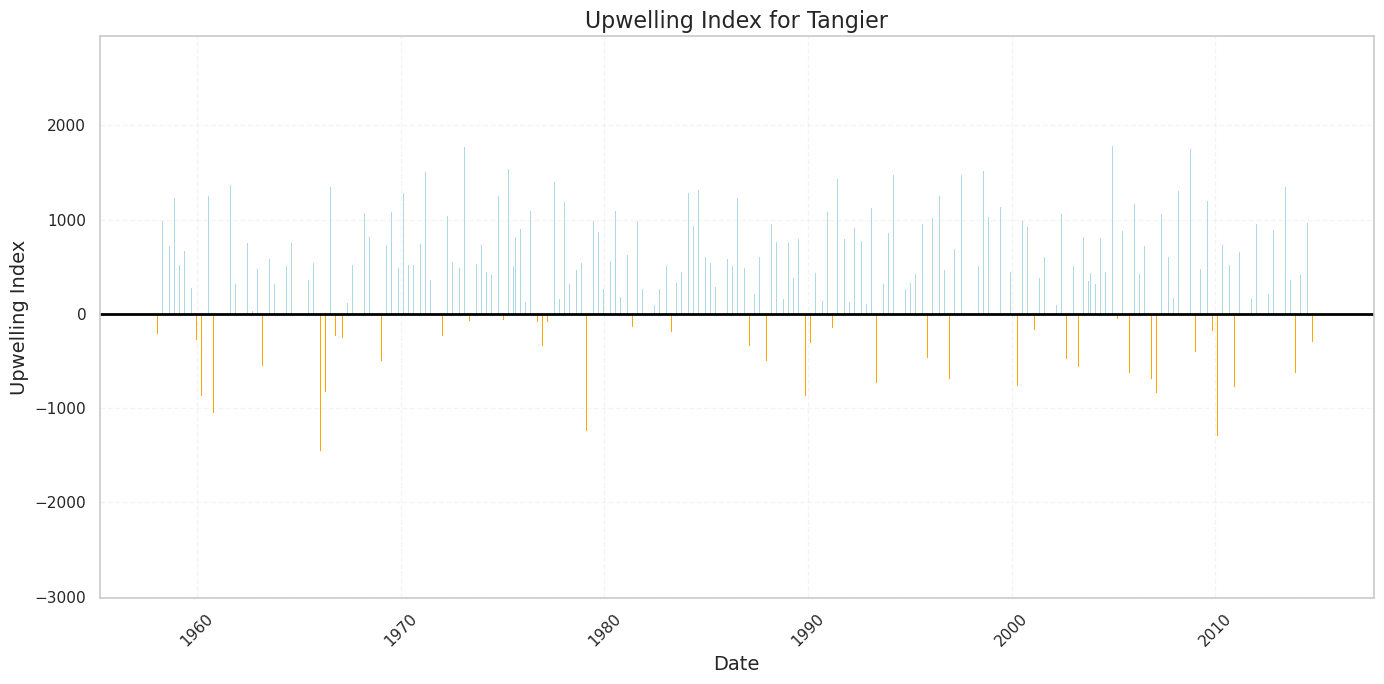

In [78]:
import matplotlib.pyplot as plt

# Extract the Upwelling Index for Tangier using the coordinates for longitude and latitude
longitude_index = int(CITY["Tangier"]["longitude"])
latitude_index = int(CITY["Tangier"]["latitude"])

# Extract the relevant time series
MAP_2 = UI[:,  longitude_index,latitude_index]

# Create a figure for plotting
plt.figure(figsize=(14, 7))

# Define colors for positive and negative values
colors = ['lightblue' if val >= 0 else 'orange' for val in MAP_2.values]

# Create a bar plot using time_counter as x-axis
plt.bar(MAP_2.time_counter.values, MAP_2.values, color=colors, width=5.0, edgecolor='none')

# Add horizontal line at y=0
plt.axhline(0, color='black', linewidth=2)

# Add titles and labels
plt.title('Upwelling Index for Tangier', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Upwelling Index', fontsize=14)

# Customize x-axis ticks for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(visible=True, linestyle='--', alpha=0.2)

# Tighten layout to fit elements nicely
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
latitude_index

35